# AMATH 342 HW 3

<p> <b> Avinash Joshi </b> </p>
<p> <b> AMATH 342 Wi 22 </b> </p>
<p> <b> Prof. Shea-Brown </b> </p>
<p> <b> 31 January 2022 </b> </p>

## 1

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams['figure.dpi']=200
import numpy as np

def gaussian(mu,sigma, x):   
    maxrate = 300 # max firing rate
    f = maxrate*np.exp(-0.5*((x-mu)/sigma)**2)
    return f

def cockroach_tuning(stimDir, cell_num):
    
    if cell_num == 1:
        mu = 45
        sigma = 5
        f = gaussian(mu, sigma, stimDir)
    elif cell_num == 2:
        mu = 45
        sigma = 10
        f = gaussian(mu, sigma, stimDir) 
    else:
        mu = 30
        sigma = 10
        f1 = gaussian(mu, sigma, stimDir)
        mu = 60
        f2 = gaussian(mu, sigma, stimDir)
        f = (f1 + f2)

    return f

def spikesumf(stimDir, ntrials):
    cell_num=1
    nmsec = 300
    times=np.arange(nmsec) #array of time points (1 msec apart)
    spiketrain = np.zeros((ntrials,nmsec))      # set up output data
    rate = cockroach_tuning(stimDir, cell_num)  #returns rate, in Hz.       
    tau = 100      # adaptation time constant in msec
    delta_t=0.001  #time bin, in seconds (1 msec)
    ratelist = rate*np.exp(-times/tau)  # list of adapting rates 
    rng = np.random.default_rng()
    spikesum = np.zeros((ntrials))

    for j in np.arange(ntrials): #trial loop
        for i in np.arange(nmsec):
                   spiketrain[j,i] = np.round(rng.uniform(0,1,1) + ratelist[i]*delta_t -1/2 )
        spikesum[j] = np.sum(spiketrain[j,:])
    return spikesum

## 1a

To plot the histograms of the probability of the different stimulus directions, a function that found the total number of spikes was created in the section above. This function, when called, stimuluates a cell at the specified stimulus direction. From here, the two close stimuli are weighted by the total number of trials then placed into histograms of the total spikes per trial by probability normalized by the number of trials.

Since the weights are normalized, adding the height of the bar will be equivalent to adding the probabilities together. 

To calculate the error rate of confusing a lower stimulus angle with a higher one, the histogram bars of the lower stimulus which overlap the higher stimulus angle and whose probabilities are less than that of the higher angled stimulus - the trials where the cell would incorrectly pick the higher angled stimulus - are added together. If this total error is greater than 10%, the iterative process halts.

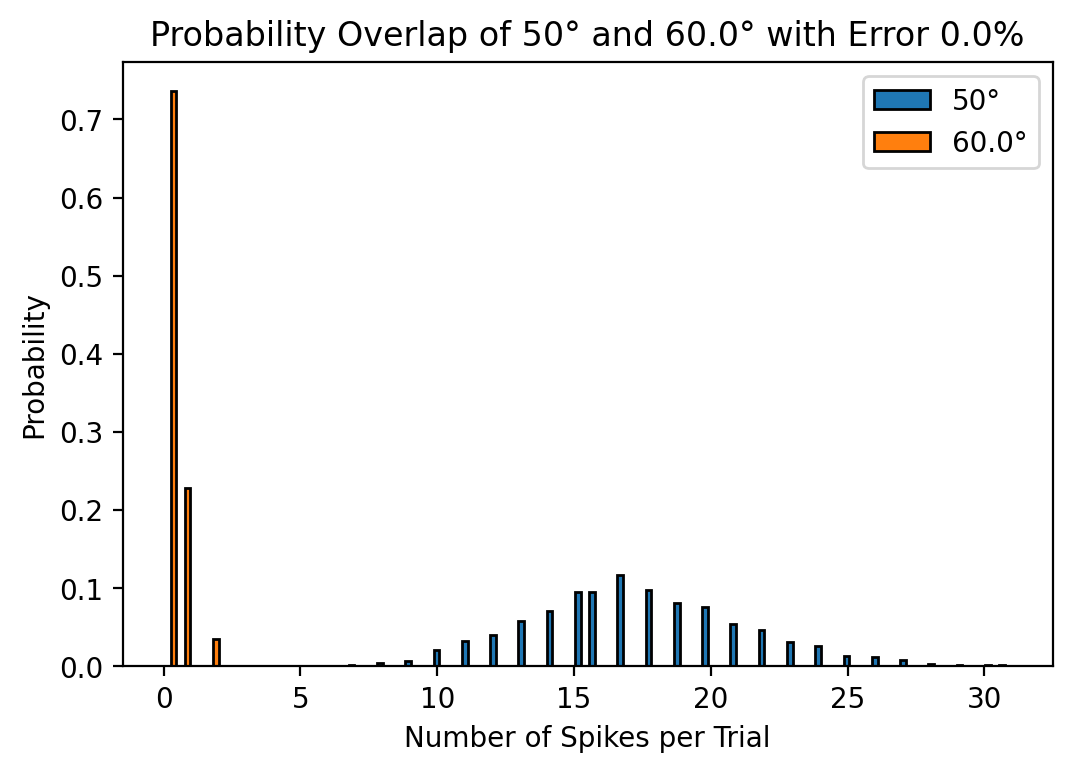

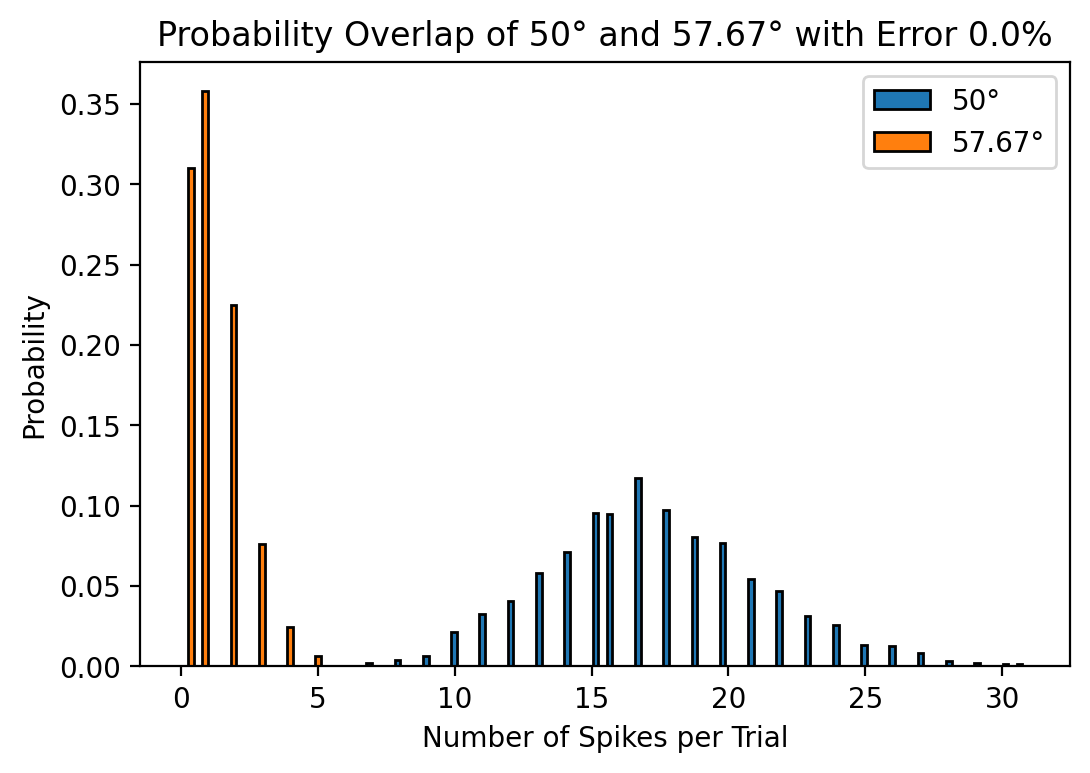

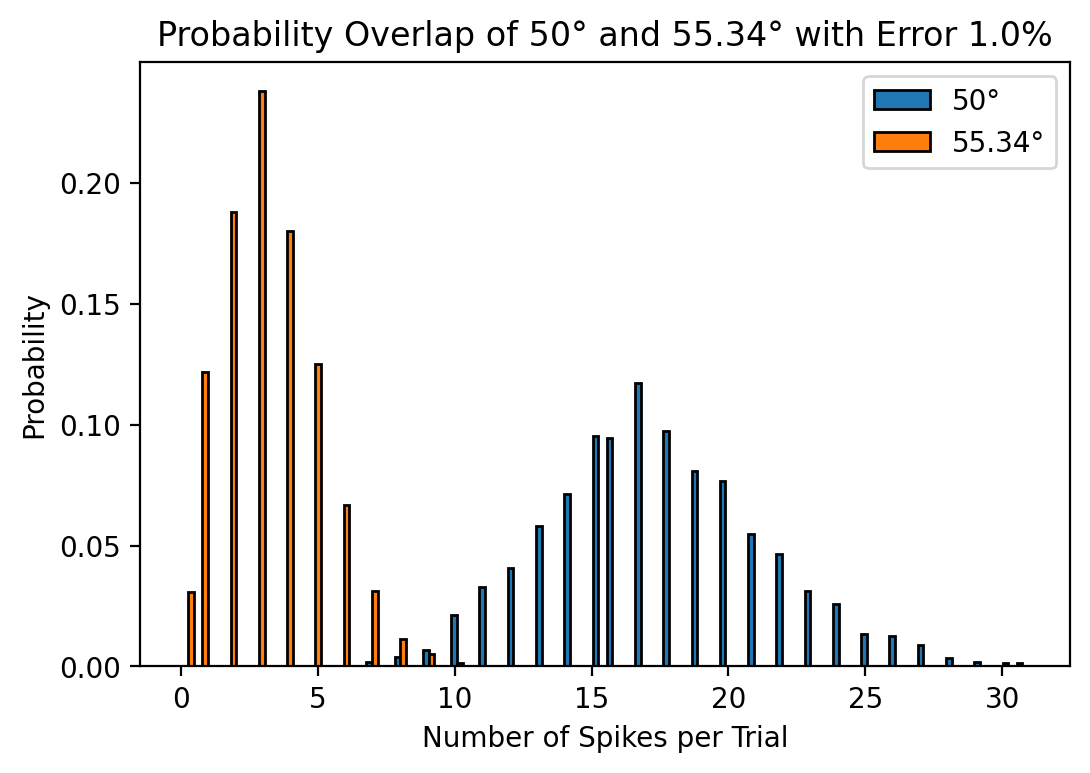

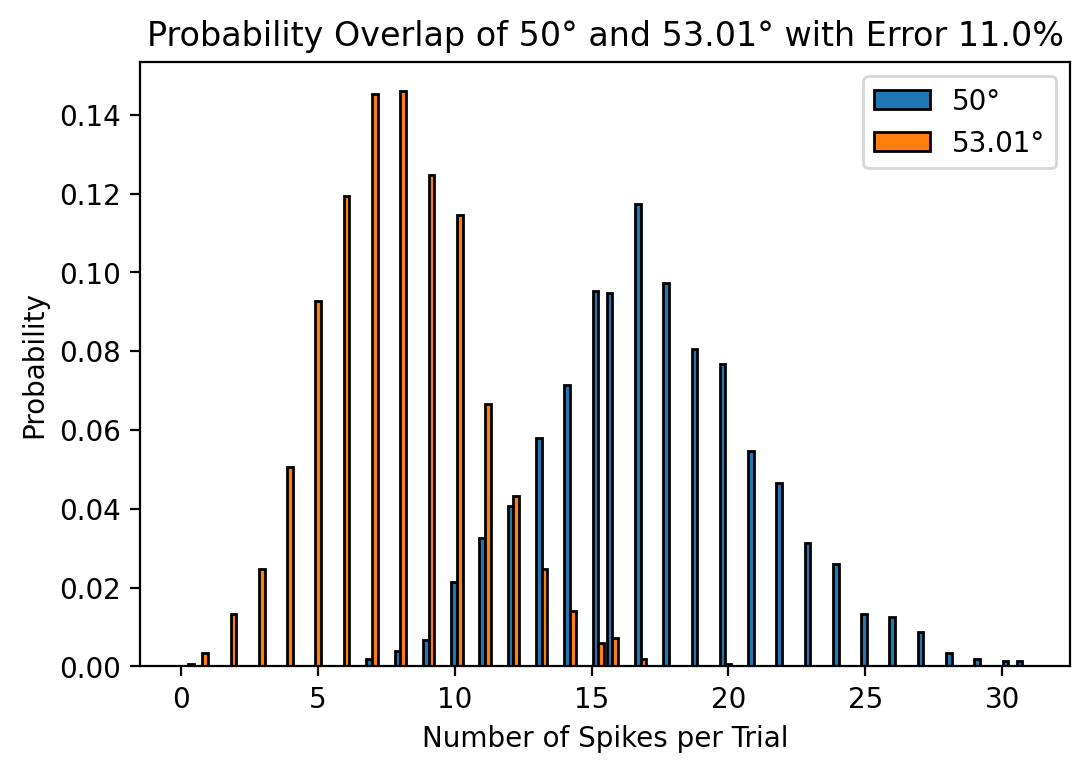

The probability that the cell chose the wrong stimulus given a stimulus of 50° is ~11.33333333333332% at 53.01°


In [368]:
trials = 1500
spikesum50 = spikesumf(50,trials)
delta = 0.1
error1 = 0
error2 = 0

for x in np.arange(0,10,2.33):
    xdir = 60 - x
    spikesumx = spikesumf(xdir,trials)   
    inter = np.ones((trials)) / trials
    n, bins, patches = plt.hist([spikesum50, spikesumx], bins = 60, weights  = [inter, inter],
                                edgecolor = 'k', label = ['50°','{}°'.format(xdir)])        
    for ii in range(int(max(n.shape))):
        if (n[0,ii] > n[1,ii]):
            error1 = error1 + n[1,ii]
        elif (n[1,ii] > n[0,ii]):
            error2 = error2 + n[0,ii]
    titleE = np.round(100*error2.copy())
    plt.xlabel('Number of Spikes per Trial')
    plt.ylabel('Probability')
    plt.title('Probability Overlap of 50° and {}° with Error {}%'.format(xdir, titleE))
    plt.legend()
    plt.show()
    if (error1 > delta or error2 > delta):
        print('The probability that the cell chose the wrong stimulus given a stimulus of 50° is ~{}% at {}°'
              .format((error2.copy()*100),xdir))
        break
    error = 0

## 1b

The stimulus must be about 3° higher from 50° in order for the cell to chose the incorrect stimulus, the higher stimulus, at about 11.33%.

## 1c

For the lower, correct stimulus, 20°, no stimulation is to be expected, so a false reading of the higher stimulus will only occur when the higher stimulus generates no response from the cell..

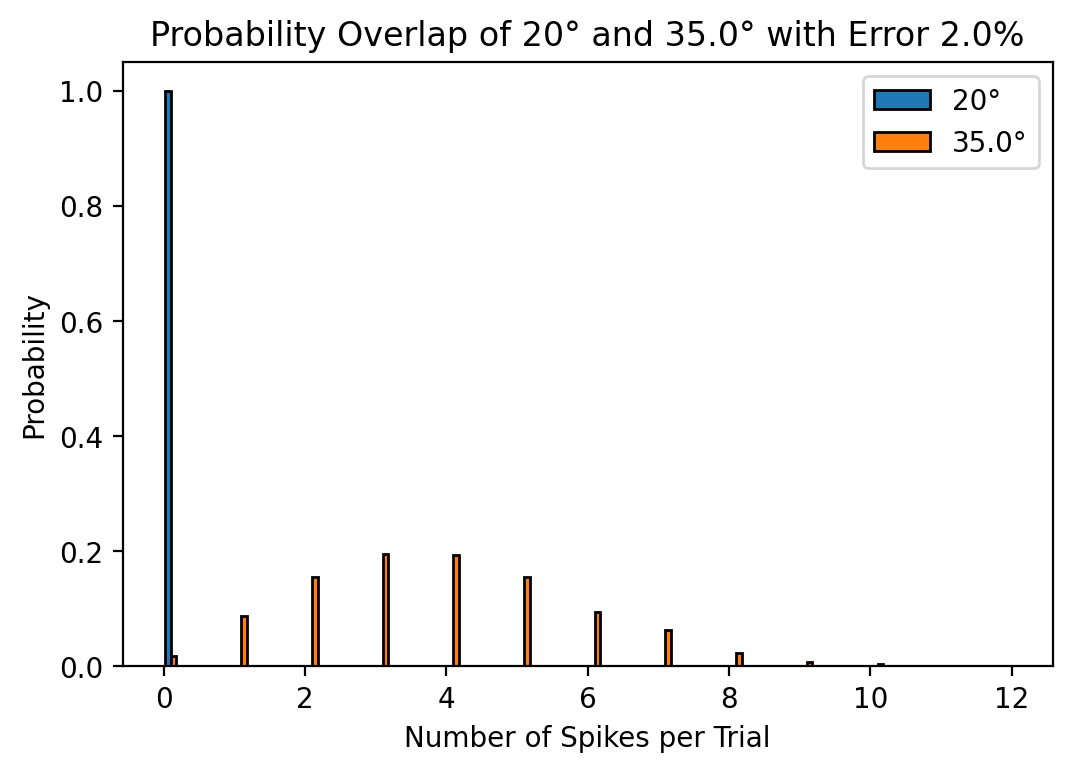

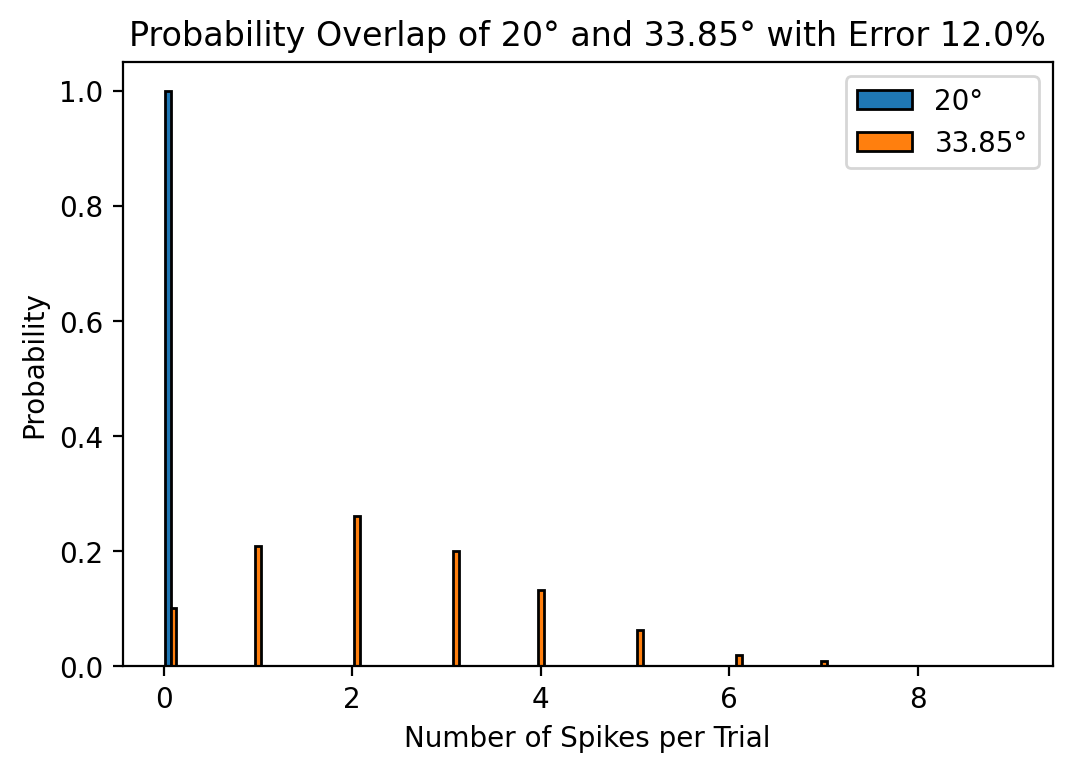

The probability that the cell chose the wrong stimulus given a stimulus of 20° is ~12.0% at 33.85°


In [369]:
trials = 1500
spikesum20 = spikesumf(20,trials)
delta = 0.1
error1 = 0
error2 = 0

for x in np.arange(0,10,1.15):
    xdir = 35 - x
    spikesumx = spikesumf(xdir,trials)   
    inter = np.ones((trials)) / trials
    n, bins, patches = plt.hist([spikesum20, spikesumx], bins = 60, weights  = [inter, inter],
                                edgecolor = 'k', label = ['20°','{}°'.format(xdir)])        
    for ii in range(int(max(n.shape))):
        if (n[0,ii] > n[1,ii]):
            error1 = error1 + n[1,ii]
        elif (n[1,ii] > n[0,ii]):
            error2 = error2 + n[0,ii]
    titleE = np.round(100*error1.copy())
    plt.xlabel('Number of Spikes per Trial')
    plt.ylabel('Probability')
    plt.title('Probability Overlap of 20° and {}° with Error {}%'.format(xdir, titleE))
    plt.legend()
    plt.show()
    if (error1 > delta or error2 > delta):
        print('The probability that the cell chose the wrong stimulus given a stimulus of 20° is ~{}% at {}°'
              .format(titleE,xdir))
        break
    error = 0

The results should differ dramatically given that cell 1 is known to not respond to any stimulus past 25°. This is known from HW 1 through the raster plot of varying angles of stimulus on different cells. A much higher angled stimulus must be enacted upon cell 1, such as at 14° more than the actual stimulus angle, for the cell to incorrectly chose the higher stimulus 10% of the time. Having the higher angled stimulus at 14° more than the correct stimulus direction is to be expected.

If a higher angled stimulus is chosen that is much closer to the correct stimulus angle and is the same order of magnitude as in 1a, the cell wouldn't be able to distinguish either stimulus given cell 1's known behavior. 

## 2

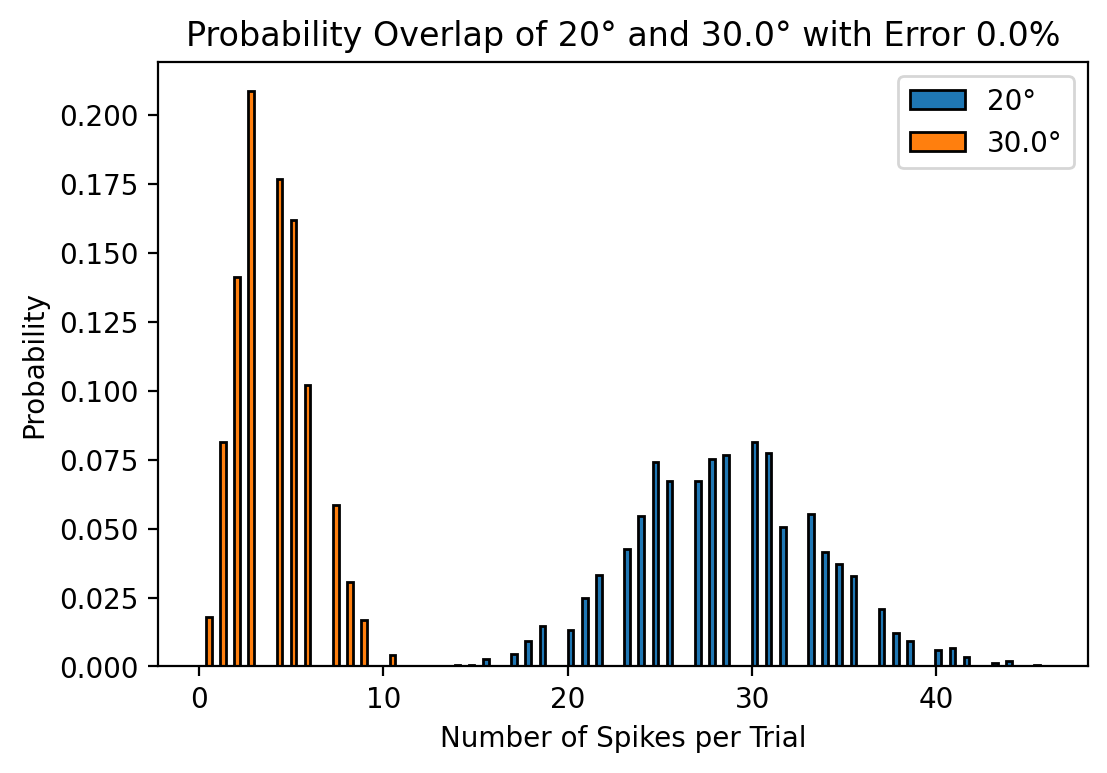

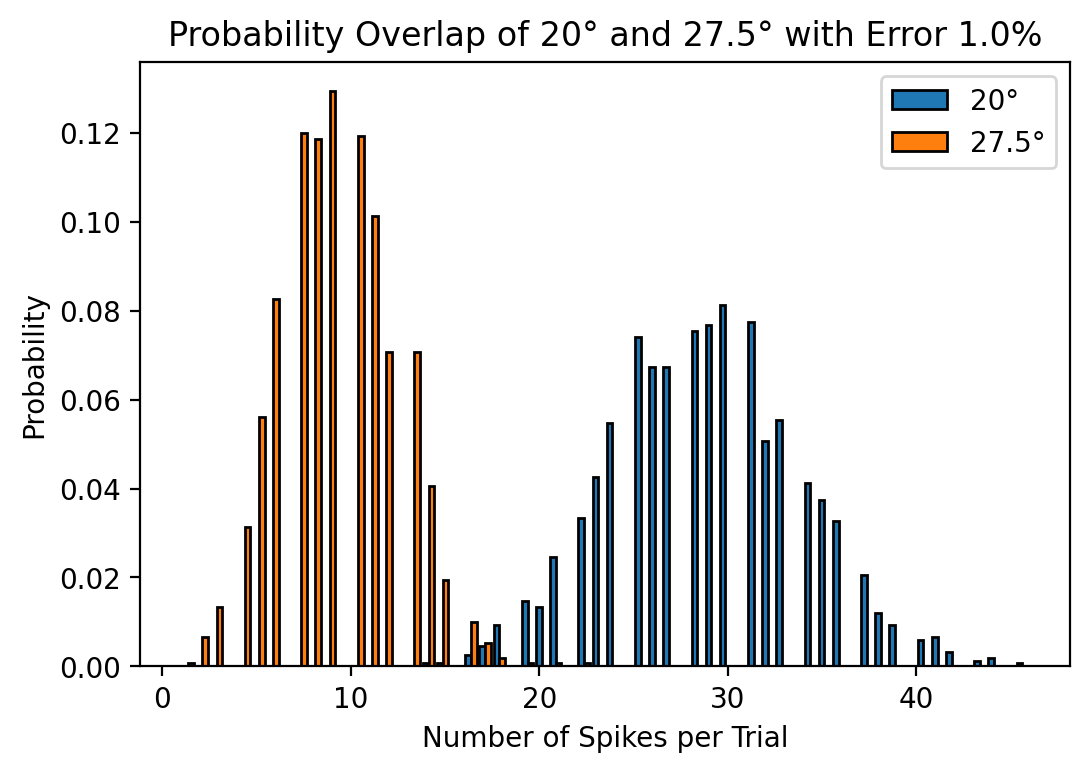

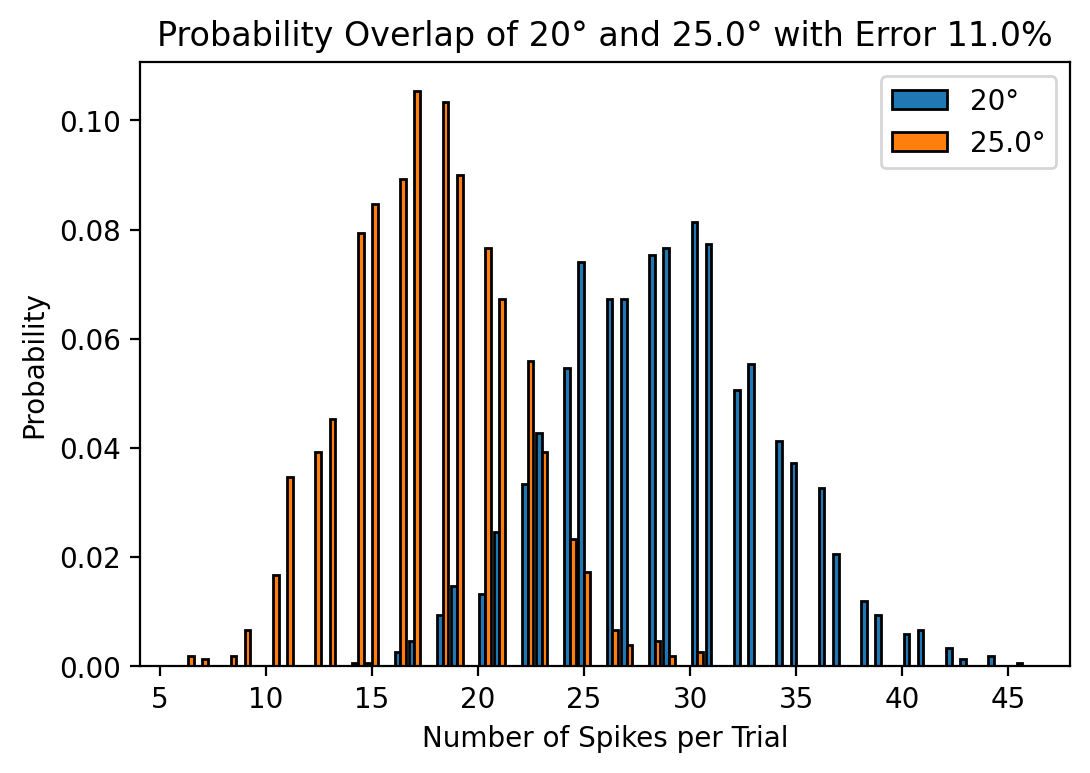

The probability that the cell chose the wrong stimulus given a stimulus of 20° is ~11.0% at 25.0°


In [380]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams['figure.dpi']=200
import numpy as np

def gaussian(mu,sigma, x):   
    maxrate = 300 # max firing rate
    f = maxrate*np.exp(-0.5*((x-mu)/sigma)**2)
    return f

def cockroach_tuning(stimDir, cell_num):
    
    if cell_num == 1:
        mu = 20  # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<   CHANGE FOUND HERE   <<<<<<<<<<<<<<<<<<<<
        sigma = 5
        f = gaussian(mu, sigma, stimDir)
    elif cell_num == 2:
        mu = 45
        sigma = 10
        f = gaussian(mu, sigma, stimDir) 
    else:
        mu = 30
        sigma = 10
        f1 = gaussian(mu, sigma, stimDir)
        mu = 60
        f2 = gaussian(mu, sigma, stimDir)
        f = (f1 + f2)

    return f

def spikesumf(stimDir, ntrials):
    cell_num=1
    nmsec = 300
    times=np.arange(nmsec) #array of time points (1 msec apart)
    spiketrain = np.zeros((ntrials,nmsec))      # set up output data
    rate = cockroach_tuning(stimDir, cell_num)  #returns rate, in Hz.       
    tau = 100      # adaptation time constant in msec
    delta_t=0.001  #time bin, in seconds (1 msec)
    ratelist = rate*np.exp(-times/tau)  # list of adapting rates 
    rng = np.random.default_rng()
    spikesum = np.zeros((ntrials))

    for j in np.arange(ntrials): #trial loop
        for i in np.arange(nmsec):
                   spiketrain[j,i] = np.round(rng.uniform(0,1,1) + ratelist[i]*delta_t -1/2 )
        spikesum[j] = np.sum(spiketrain[j,:])
    return spikesum

trials = 1500
spikesum20 = spikesumf(20,trials)
delta = 0.1
error1 = 0
error2 = 0

for x in np.arange(0,10,2.5):
    xdir = 30 - x
    spikesumx = spikesumf(xdir,trials)   
    inter = np.ones((trials)) / trials
    n, bins, patches = plt.hist([spikesum20, spikesumx], bins = 60, weights  = [inter, inter],
                                edgecolor = 'k', label = ['20°','{}°'.format(xdir)])        
    for ii in range(int(max(n.shape))):
        if (n[0,ii] > n[1,ii]):
            error1 = error1 + n[1,ii]
        elif (n[1,ii] > n[0,ii]):
            error2 = error2 + n[0,ii]
    titleE = np.round(100*error2.copy())
    plt.xlabel('Number of Spikes per Trial')
    plt.ylabel('Probability')
    plt.title('Probability Overlap of 20° and {}° with Error {}%'.format(xdir, titleE))
    plt.legend()
    plt.show()
    if (error1 > delta or error2 > delta):
        print('The probability that the cell chose the wrong stimulus given a stimulus of 20° is ~{}% at {}°'
              .format(titleE,xdir))
        break
    error = 0

To change the angle for which the cell made a 10% error or more by incorrectly picking a higher angled stimulus was done by changing the distribution of tuning curve, specifically the value of $\mu$, so as to center the Gaussian distribution at the lower, correctly angled stimulus of 20°. This was done by changing $\mu$ from 45 to 20. Now, the cell responds strongly to stimulus around 20° while being unable to register stimulus at much, much higher angles, such as 50°.

Now, the cell mistakes the correct angle of stimulus of 20° by about ~11.0% at 5.0° higher instead of the 14° that was initially recorded.

Thanks for reading!

- Avi